# Exploring Data Analysis on SuperStore Dataset

In [ ]:
# Importing useful libraries
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats

In [ ]:
# Reading csv file of superstore dataset using pandas
df = pd.read_csv("/content/SampleSuperstore.csv");
print(df.head(4))
print(df.shape)

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
(9994, 13)


## Data Analysis

In [ ]:
df.isnull().sum()   # For checking any null values present in our data or not.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.describe()  #Statistical measures of our data

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()    # It displays the data types for our columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.nunique()   # Number of unique values in each column

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Points to Understand our dataset**

* Different Types of Shipping Modes are (Standard, Second, First Class and Same Day)
*Categories of the Products are (Office Supplies, Technology, and Furniture).
* Products are delivered in 49 states.
* Region of services is (East, West, South, and Central).

# Data Visualization

In [ ]:
cor = df.corr()   # Correlation matrix 
cor

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


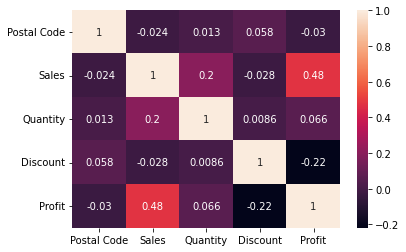

In [ ]:
# Plotting heatmap using correlation matrix
sns.heatmap(cor,annot=True)
# You can see that Profit and Sales have more likely having correlation.

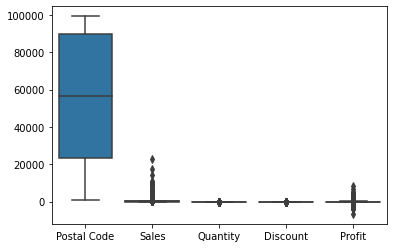

In [ ]:
#Checking is there any outliers for our data
# we can check it by using box plot
sns.boxplot(data=df)
#there are no outliers , you can see the graph.

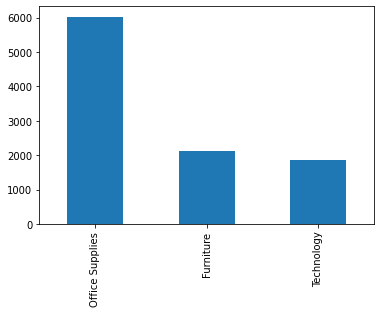

In [ ]:
a = df['Category'].value_counts()
a.plot(kind="bar")
plt.show()

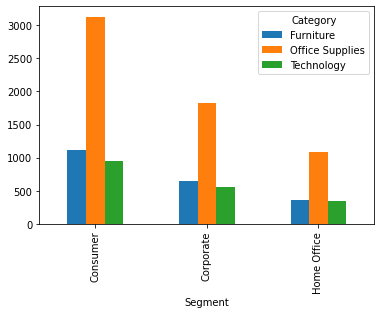

In [ ]:
# To form a graph showing different categories under each segment
pd.crosstab(df['Segment'],df['Category']).plot(kind="bar",stacked=False)

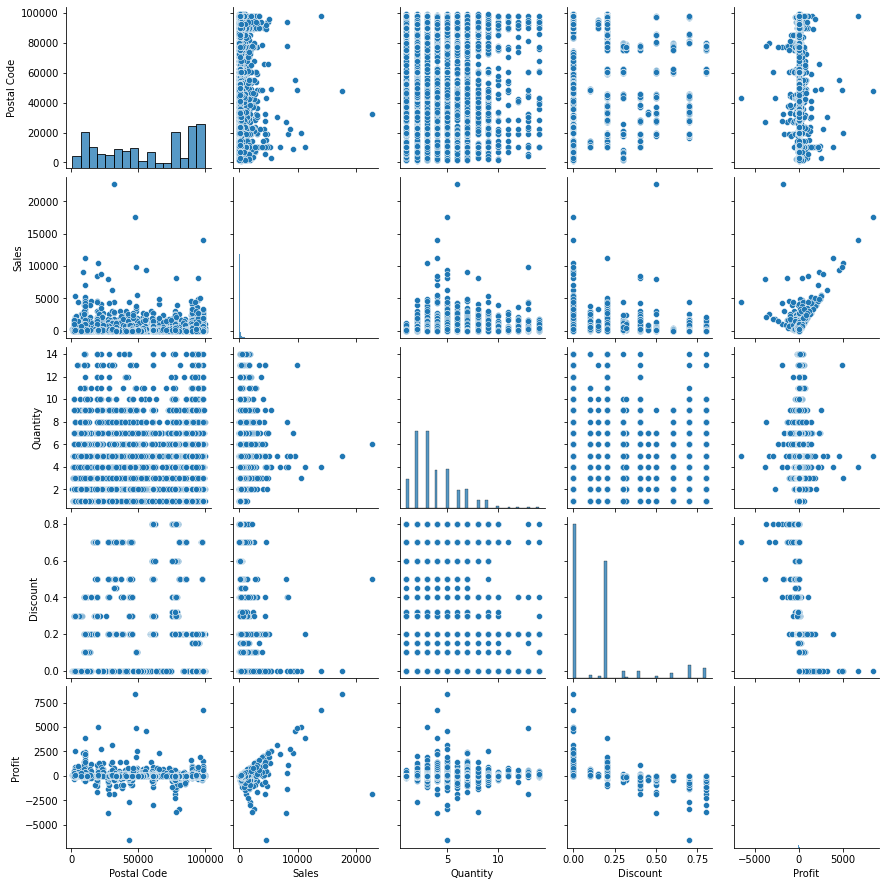

In [ ]:
sns.pairplot(df)

* From the profit vs discount graph from above we infer that when the discount is till 0.3, there is a profit.¶ But if the discount increases beyond 0.3 there is a loss happening
* From the profit vs sales graph from above we can infer it is not necessary true that with the increase in sale profit increases.
* From the discount vs sales graph from above we can infer that after a point when discount is increasing the total sales amount is decreasing.

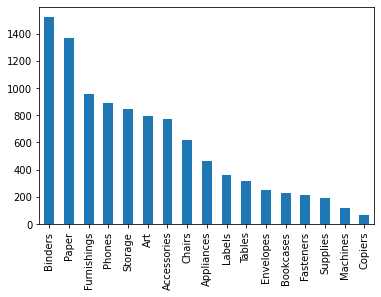

In [ ]:
df['Sub-Category'].value_counts().plot(kind="bar")
#Binders are the most selling product

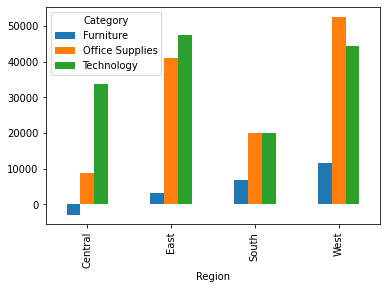

In [ ]:
pd.crosstab(df["Region"],df["Category"],df["Profit"],aggfunc='sum').plot(kind="bar",stacked=False)
# East and West Regions earning more profit compared to Central and south. 

Although office supplies is the most selling category but the profit is highest from the technology sector Under Technology the purchasing ie the profit has come more from the Consumers segment.

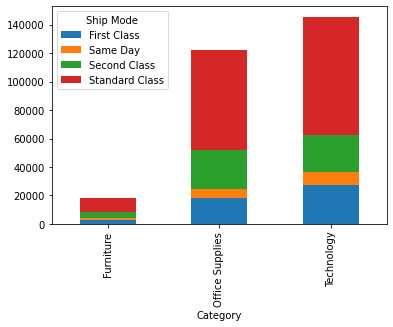

In [ ]:
pd.crosstab(index=df["Category"],columns=df["Ship Mode"],values=df["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)
#The profit is high when the ship mode is "Standard Class" and the Profit is negligible when the ship Mode is "Same day".

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


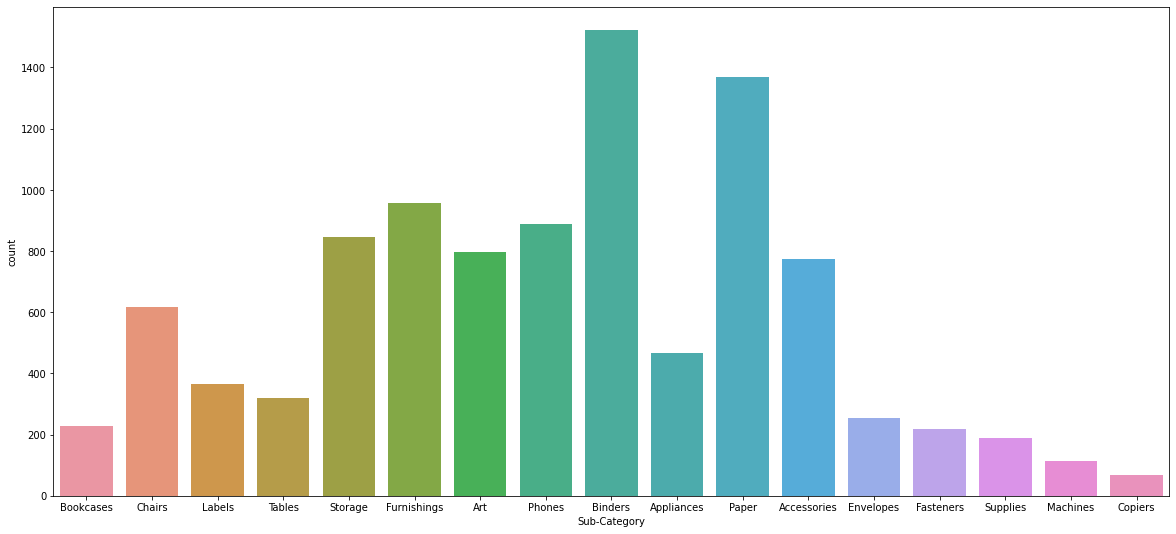

In [ ]:
plt.figure(figsize=(20,9))
sns.countplot(x=df['Sub-Category'])
print(df['Sub-Category'].value_counts())
#Highest sold sub category is Binders and lowest sold sub category is Copiers.

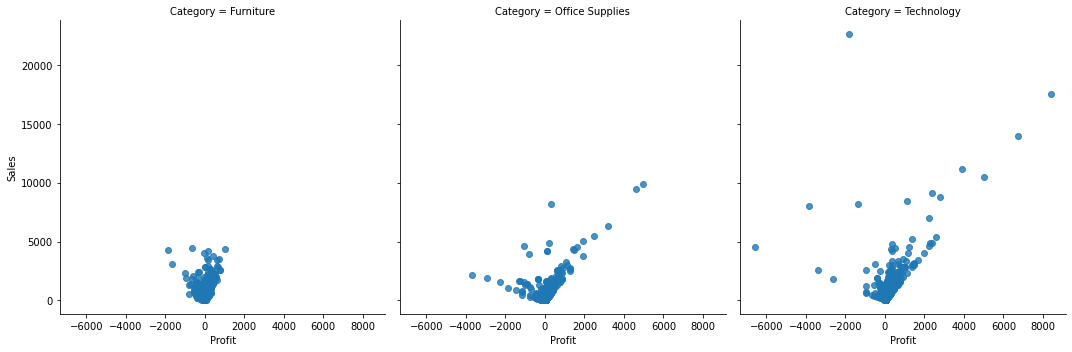

In [ ]:
sns.lmplot(x="Profit",y="Sales",data=df,fit_reg=False,col="Category")
plt.show()
# The profit is very low almost 0 in the Furniture sector also the profit is high in the Technology sector.

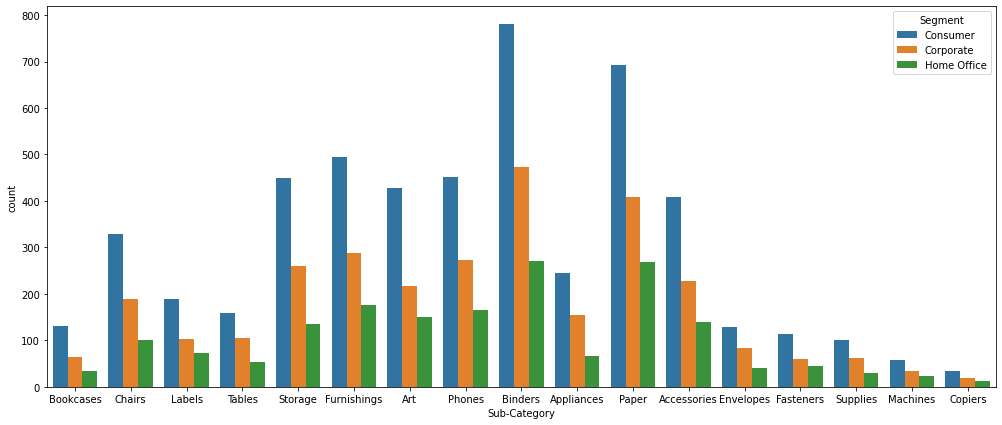

In [ ]:
plt.figure(figsize=(17,7))
sns.countplot(x='Sub-Category',hue='Segment',data=df)


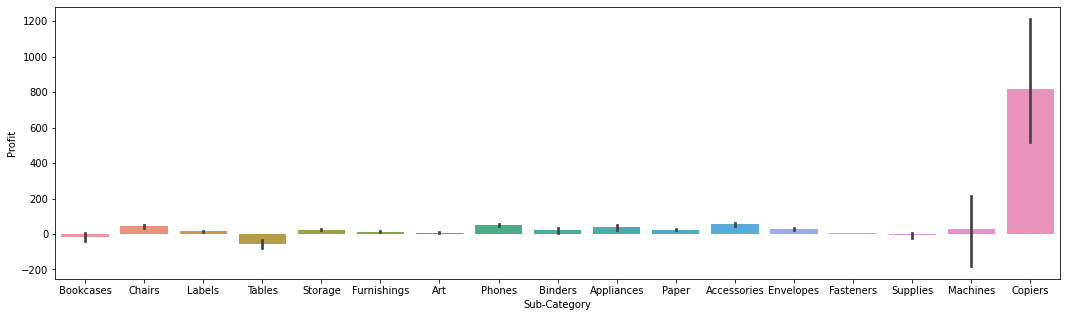

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Forming a combined barplot for all the sub categories with respect to profit
fig,axs=plt.subplots(1,1,figsize=(18,5))
sns.barplot("Sub-Category","Profit",data=df)

**We observe that Table, Bookcases and Fasteners are in loss whereas the Copiers sub category has the highest amount of profit.**

## Final Results

* When the discount is till 0.3 there is a profit.But if the discount increases beyond 0.3 there is a loss
* Although office supplies is the most selling category but the profit is highest from the technology sector. Under which the the profit has come more from the Consumers segment.
*Although Copiers is the least selling sub-category but has given the most profit out of all the sub-categories.
*There is a huge loss from the furniture section.
*The profit is high when the ship mode is "Standard Class" and the Profit is negligible when the ship Mode is "Same day"
* The profit is more from the east and west region of the country

## Suggestions

* profit should not be increased more than 0.3
* Shipping charges should be increased
* should focus on technology section.

## **THANK YOU!**